In [72]:
import pandas as pd

In [73]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [74]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [75]:
import tensorflow as tf

In [76]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [77]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [78]:
df[cols_to_norm]=df[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()),axis=0)

In [79]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [80]:
num_preg=tf.feature_column.numeric_column(key='Number_pregnant')
gluc=tf.feature_column.numeric_column(key='Glucose_concentration')
blood=tf.feature_column.numeric_column(key='Blood_pressure')
triceps=tf.feature_column.numeric_column(key='Triceps')
insulin=tf.feature_column.numeric_column(key='Insulin')
bmi=tf.feature_column.numeric_column(key='BMI')
pedigree=tf.feature_column.numeric_column(key='Pedigree')
age=tf.feature_column.numeric_column(key='Age')

In [81]:
# group=tf.feature_column.categorical_column_with_vocabulary_list("Group",vocabulary_list=['A','B','C'])

In [82]:
group=tf.feature_column.categorical_column_with_hash_bucket("Group",hash_bucket_size=10)

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

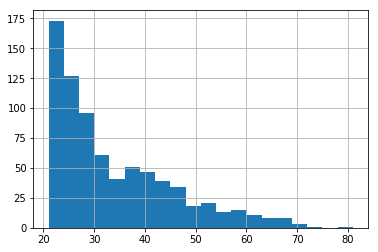

In [84]:
df['Age'].hist(bins=20)

In [85]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [86]:
age_bucket

_BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [87]:
feat_cols=[num_preg,gluc,blood,triceps,insulin,bmi,pedigree,group,age_bucket]

In [88]:
X=df.drop("Class",axis=1)

In [89]:
X.head()


,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [90]:
y=df["Class"]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [93]:
inp_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [94]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rijhwani\\AppData\\Local\\Temp\\tmplj8p65da', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000010CD3132C18>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [95]:
model.train(input_fn=inp_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\rijhwani\AppData\Local\Temp\tmplj8p65da\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 176.492
INFO:tensorflow:loss = 6.13842, step = 101 (0.573 sec)
INFO:tensorflow:global_step/sec: 222.419
INFO:tensorflow:loss = 3.8187, step = 201 (0.460 sec)
INFO:tensorflow:global_step/sec: 322.764
INFO:tensorflow:loss = 7.56153, step = 301 (0.299 sec)
INFO:tensorflow:global_step/sec: 317.625
INFO:tensorflow:loss = 7.12228, step = 401 (0.311 sec)
INFO:tensorflow:global_step/sec: 258.378
INFO:tensorflow:loss = 4.54673, step = 501 (0.391 sec)
INFO:tensorflow:global_step/sec: 307.713
INFO:tensorflow:loss = 5.87807, step = 601 (0.321 sec)
INFO:tensorflow:global_step/sec: 337.069
INFO:tensorflow:loss = 5.64344, step = 701 (0.298 sec)
INFO:tensorflow:global_step/sec: 320.688
INFO:tensorflow:loss = 3.76167, step = 801 (0.312 sec)
INFO:tensorflow:global_step/sec: 235.778


In [96]:
eval_inp_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [97]:
res=model.evaluate(input_fn=eval_inp_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-01-23-15:35:02
INFO:tensorflow:Restoring parameters from C:\Users\rijhwani\AppData\Local\Temp\tmplj8p65da\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

In [98]:
res

{'accuracy': 0.73160172,
 'accuracy_baseline': 0.64935064,
 'auc': 0.78502059,
 'auc_precision_recall': 0.62139803,
 'average_loss': 0.54118574,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.2089128,
 'prediction/mean': 0.38819531}

In [99]:
pred_inp_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [100]:
predictions=model.predict(input_fn=pred_inp_func)

In [101]:
list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\rijhwani\AppData\Local\Temp\tmplj8p65da\model.ckpt-1000


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54368871], dtype=float32),
  'logits': array([ 0.17520171], dtype=float32),
  'probabilities': array([ 0.45631126,  0.54368871], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.59898359], dtype=float32),
  'logits': array([ 0.40123183], dtype=float32),
  'probabilities': array([ 0.40101644,  0.59898359], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.41651207], dtype=float32),
  'logits': array([-0.33710831], dtype=float32),
  'probabilities': array([ 0.58348793,  0.4165121 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.35739559], dtype=float32),
  'logits': array([-0.58668596], dtype=float32),
  'probabilities': array([ 0.64260441,  0.35739565], dtype=flo

In [102]:
dnn=tf.estimator.DNNClassifier([10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rijhwani\\AppData\\Local\\Temp\\tmpixp_5ce1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000010CD3E39B70>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [103]:
embedded_grp=tf.feature_column.embedding_column(categorical_column=group,dimension=4)

In [104]:
feat_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string),
 _BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))]

In [105]:
feat_cols=[num_preg,gluc,blood,triceps,insulin,bmi,pedigree,embedded_grp,age_bucket]

In [106]:
feat_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _EmbeddingColumn(categorical_column=_HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string), dimension=4, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x0000010CD3E398D0>, ckpt_to_load_from=None, t

In [107]:
inp_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [113]:
dnn=tf.estimator.DNNClassifier([10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rijhwani\\AppData\\Local\\Temp\\tmpsi8b7xma', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000010CD10BA9B0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [114]:
dnn.train(input_fn=inp_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\rijhwani\AppData\Local\Temp\tmpsi8b7xma\model.ckpt.
INFO:tensorflow:loss = 6.92468, step = 1
INFO:tensorflow:global_step/sec: 185.035
INFO:tensorflow:loss = 4.51904, step = 101 (0.540 sec)
INFO:tensorflow:global_step/sec: 285.743
INFO:tensorflow:loss = 4.34056, step = 201 (0.350 sec)
INFO:tensorflow:global_step/sec: 328.078
INFO:tensorflow:loss = 4.80805, step = 301 (0.306 sec)
INFO:tensorflow:global_step/sec: 290.795
INFO:tensorflow:loss = 7.35558, step = 401 (0.346 sec)
INFO:tensorflow:global_step/sec: 309.734
INFO:tensorflow:loss = 3.05703, step = 501 (0.322 sec)
INFO:tensorflow:global_step/sec: 320.644
INFO:tensorflow:loss = 3.512, step = 601 (0.314 sec)
INFO:tensorflow:global_step/sec: 317.668
INFO:tensorflow:loss = 5.4276, step = 701 (0.312 sec)
INFO:tensorflow:global_step/sec: 331.308
INFO:tensorflow:loss = 3.89867, step = 801 (0.305 sec)
INFO:tensorflow:global_step/sec: 276.002
IN

In [115]:
eval_inp_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [116]:
dnn.evaluate(input_fn=eval_inp_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-01-23-15:41:08
INFO:tensorflow:Restoring parameters from C:\Users\rijhwani\AppData\Local\Temp\tmpsi8b7xma\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82748979,
 'auc_precision_recall': 0.70256484,
 'average_loss': 0.53395182,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1392865,
 'prediction/mean': 0.45873475}